In [2]:
import math
import matplotlib.pyplot as plt
import numpy

In [3]:
def caudal(v,a):
    return v*a
def perdidav(f,v):
    return 240*f*v*v/(2*9.81)
def perdidap(f,v,L,D):
    return f*(L/D)*v*v/(2*9.81)
def perdidac(v,lamb):
    return lamb*v*v/(2*9.81)
def reynolds(caudal,D):
    return 4*caudal/(math.pi*D*1.99*10**(-6))
def fff(reynolds,D):
    rugosidad = 0.0015/(D*1000)
    lo = 0
    hi = 100
    aux = 0
    for i in range(0,100):
        me = (lo+hi)/2
        if(1/math.sqrt(me) + 2*math.log10(rugosidad/3.7 + 2.51/(reynolds*math.sqrt(me))) > 0):
            lo = me
        else:
            hi = me
    return lo

In [4]:
fff(36190.097,100/1000)

0.022525334813957198

In [145]:
#qt = [500,550,600,650,700,750]
qt = []
for i in range(0,2000):
    qt.append(i/(6*100))
#for i in range(0,len(qt)):
#    qt[i] = qt[i]/(60*1000)

In [146]:
q1 = []
q2 = []
vx = []
vy = []
for j in range(0,len(qt)):
#probamos valores de velocidad1 en m/s
    #for i in range(700000,2000000):
    lo = 0
    hi = 100
    for i in range(1,200):
        #v1 = i/200000
        me = (lo+hi)/2
        #v1=i/800000
        v1 = me
        #velocidad entre 0.00025,20
        caudal1 = caudal(v1,7.538*10**(-3))
        caudal2 = qt[j]-caudal1
        if(caudal2 < 0):
            hi = me
            continue
        v2 = caudal2/(1.945*10**(-3))
        reynolds1 = reynolds(caudal1,0.1)
        reynolds2 = reynolds(caudal2,0.05)
        f1 = fff(reynolds1,0.1)
        f2 = fff(reynolds2,0.05)
        perdida2 = perdidap(f2,v2,30,0.05)+perdidac(v2,f2*30)+perdidac(v2,f2*30)
        perdida1 = perdidap(f1,v1,30,0.1)+perdidac(v1,f1*30)+perdidac(v1,f1*30)+perdidav(f1,v1)
        #print(perdida1,perdida2)
        #if(abs(perdida1-perdida2) < 0.005):
        if(perdida1 < perdida2):
            lo=me
        else:
                hi=me
        #if(perdida2-perdida1<0):
            #q1.append(caudal1)
            #q2.append(caudal2)
            #vx.append(v1)
            #vy.append(v2)
            #break
    q1.append(caudal1)
    q2.append(caudal2)
    vy.append(v1)
    vx.append(v2)
    #print(j,q1[j],q2[j])

In [87]:
print(q1)
print(q2)
print(vx)
print(vy)

[9.381817832903458e-61, 0.0005486318977779239, 0.0010946322488862706, 0.001639954860421027, 0.0021848791738524236, 0.0027295259708203733, 0.003273962092084876, 0.003818229675232515, 0.004362357557453937, 0.004906366628573476, 0.005450272668150445, 0.0059940879850312115, 0.006537822428649831, 0.007081484045462314, 0.007625079522912522, 0.008168614500038094, 0.008712093791033583, 0.009255521550099498, 0.009798901395555597, 0.01034223650499549, 0.010885529689412077, 0.01142878345176314, 0.01197200003383048, 0.012515181454139547, 0.013058329538960358, 0.013601445947888344, 0.014144532195132113, 0.014687589667366293, 0.015230619638810696, 0.015773623284050495, 0.01631660168900231, 0.01685955586034721, 0.017402486733687657, 0.01794539518063555, 0.01848828201499959, 0.019031147998209666, 0.019573993844091468, 0.02011682022308497, 0.02065962776598509, 0.021202417067269583, 0.021745188688069274, 0.022287943158827102, 0.022830680981685204, 0.02337340263263395, 0.023916108563451357, 0.02445879920

In [147]:
for i in range(0,len(q1)):
    q1[i] = q1[i]*(1000*60)
    q2[i] = q2[i]*(1000*60)
    qt[i] = qt[i]*(1000*60)

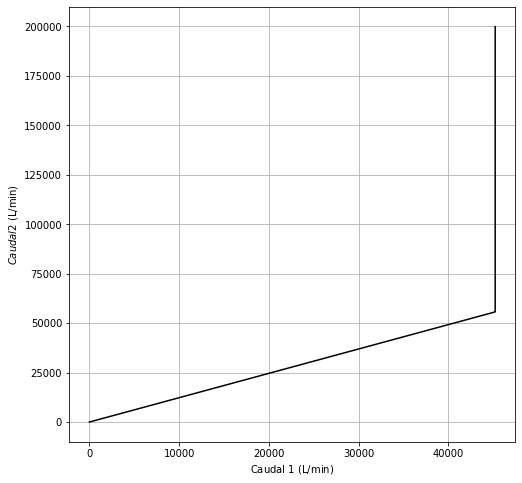

In [148]:
plt.figure(figsize=(8,8))
plt.plot(q1,qt,'-k')
plt.xlabel(r'Caudal 1 ($\mathrm{L}$/min)')
plt.ylabel(r'$Caudal 2$ $(\mathrm{L/min})$')
plt.grid()
#plt.savefig('khomor1.pdf')

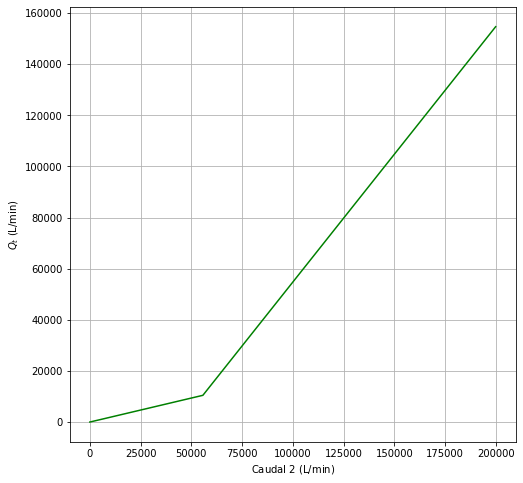

In [150]:
plt.figure(figsize=(8,8))
plt.plot(qt,q2,'-g')
plt.xlabel(r'Caudal 2 ($\mathrm{L}$/min)')
plt.ylabel(r'$Q_{t}$ $(\mathrm{L/min})$')
plt.grid()
#plt.savefig('khomor2.pdf')